In [41]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from technical_analysis.indicators import Indicators 
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'SASA.IS'
scale = 1
range_list = [5,6,7,8,10,12,14,15,20]
range_list = [i*scale for i in range_list]
period = '2y'
interval = '1d'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

[*********************100%***********************]  1 of 1 completed
Start TA-LIB module
created indicators columns with TA-LIB


In [42]:
df = data.df.copy()
df.tail()

,ad,adj_close,adx_10,adx_12,adx_14,adx_15,adx_20,adx_5,adx_6,adx_7,...,wma_12,wma_14,wma_15,wma_20,wma_5,wma_6,wma_7,wma_8,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-14,-461359105.1655,154.3000,80.0389,75.5350,71.6631,69.9159,62.7758,94.5630,91.3803,88.2456,...,141.7474,139.3571,138.1475,131.8457,147.2600,146.3905,145.8214,145.2139,0.0489,1.0000
2022-11-15,-444110402.1655,169.7000,81.5756,77.0566,73.1377,71.3623,64.0653,95.5117,92.5955,89.6265,...,146.9308,144.4581,143.1500,136.6062,155.5667,153.6714,152.2179,151.1278,0.0998,1.0000
2022-11-16,-419503397.0631,186.3000,83.0848,78.5788,74.6305,72.8331,65.3954,96.3282,93.6910,90.9120,...,153.8936,151.1486,149.6883,142.5483,167.3667,164.3476,161.8286,159.7917,0.0978,1.0000
2022-11-17,-427273479.0631,167.7000,81.7188,77.9575,74.4500,72.8055,65.7769,88.4147,88.2567,87.0939,...,157.1474,154.5743,153.2175,146.2360,169.9000,167.4619,165.1857,163.1333,-0.0998,1.0000
2022-11-18,-427273479.0631,151.0000,76.6928,74.5032,71.9965,70.7199,64.8023,71.5866,75.6480,77.3680,...,157.3679,155.2171,154.1275,147.9405,165.2267,164.5000,163.3464,162.0333,-0.0996,0.0000


In [43]:
ext_df = data.extract_features()

In [44]:
ext_df.tail()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,log_return,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,daily_return,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-14,1,1,1,1,1,1,0,0,1.0000,1.0000,...,0.0478,1,1,0,0,1,1,0,0.0489,1.0000
2022-11-15,1,1,1,1,1,1,0,0,1.0000,1.0000,...,0.0951,1,1,1,0,0,1,1,0.0998,1.0000
2022-11-16,1,1,1,1,1,1,0,0,1.0000,1.0000,...,0.0933,1,1,1,1,0,0,1,0.0978,1.0000
2022-11-17,0,1,1,1,1,1,0,0,1.0000,1.0000,...,-0.1052,1,1,1,1,1,0,0,-0.0998,1.0000
2022-11-18,0,1,1,1,1,1,1,0,1.0000,1.0000,...,-0.1049,1,1,1,1,1,1,0,-0.0996,0.0000


In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
X = ext_df.copy()
X.reset_index(inplace=True)
X.drop(columns=['Datetime', 'feature_label'], axis=1, inplace=True)
Y = ext_df.feature_label.copy()

In [47]:
Y = Y.reset_index()

In [48]:
Y.drop(columns=['Datetime'], axis=1, inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
pred = model.predict(X_test)
type(pred)

numpy.ndarray

In [52]:
pred = pred > 0.5

In [53]:
pred = pred.astype(int)

In [54]:
accuracy_score(pred, y_test)

0.6666666666666666

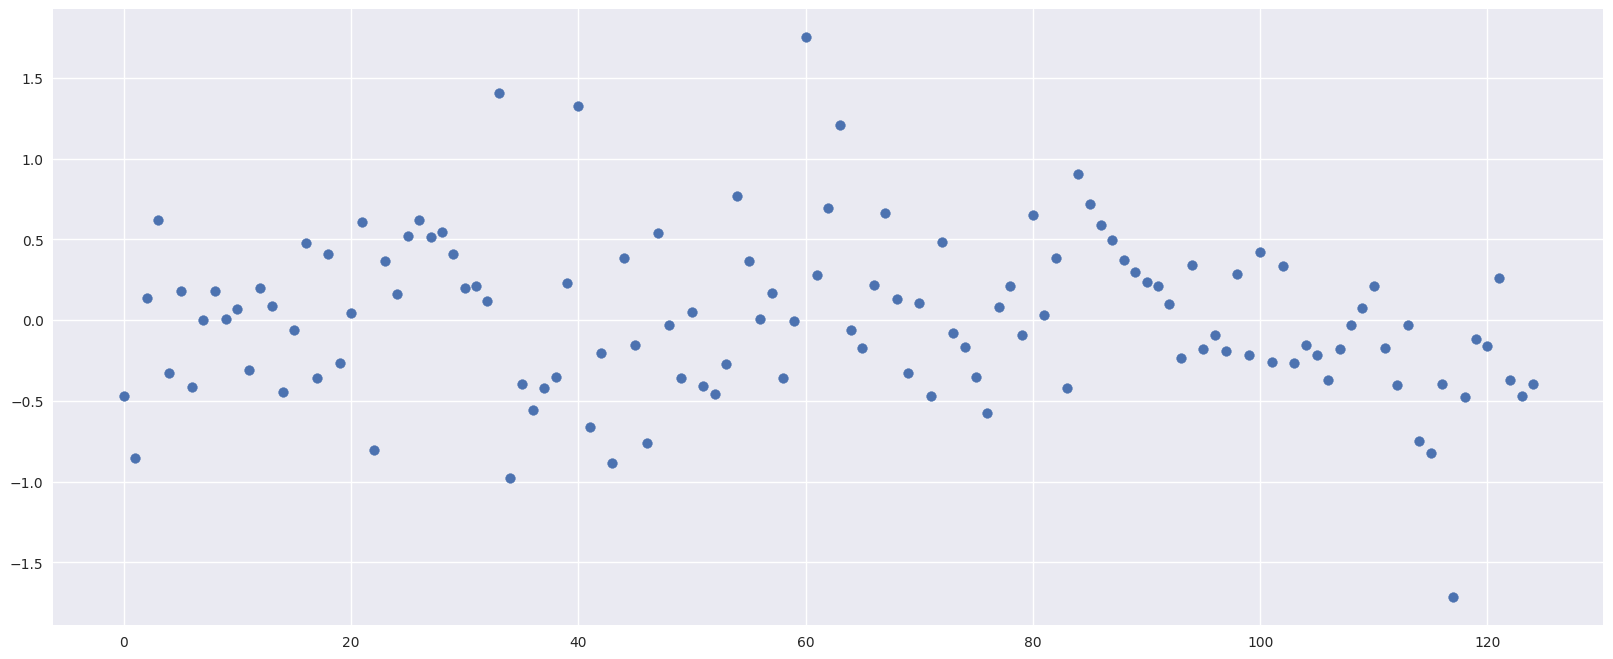

In [55]:
import matplotlib.pyplot as plt
import numpy as np
weigths = model.coef_
fig, ax = plt.subplots(1,1, figsize=(20,8))
plt.scatter(np.arange(0,len(np.column_stack(weigths).ravel())), np.column_stack(weigths).ravel())

In [56]:
np.column_stack(weigths).ravel().size

125

In [57]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [58]:
X_train.shape

(310, 125)

In [59]:
model = Sequential(
    [               
        tf.keras.Input(shape=(X_train.shape[1],)),
        Dense(units=128, activation='sigmoid'),
        Dense(units=64, activation='sigmoid'),
        Dense(units=32, activation='sigmoid'),
        Dense(units=16, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)   

In [60]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               16128     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 27,009
Trainable params: 27,009
Non-trainable params: 0
_________________________________________________________________


In [61]:
[layer1, layer2, layer3, *a] = model.layers

In [62]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (125, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 32), b3 shape = (32,)


In [63]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs=40
)

Epoch 1/40
10/10 [==============================] - 0s 5ms/step - loss: 0.6928
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6836
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6890
Epoch 4/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6801
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6784
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 0.6746
Epoch 7/40
10/10 [==============================] - 0s 5ms/step - loss: 0.6673
Epoch 8/40
10/10 [==============================] - 0s 5ms/step - loss: 0.6590
Epoch 9/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6494
Epoch 10/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6386
Epoch 11/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6289
Epoch 12/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6192
Epoch 13/40
10/10 [==============================

In [64]:
pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [65]:
pred = (pred >= 0.5).astype(int)

In [66]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 115ms/step - loss: 0.6802
test loss, test acc: 0.6801925301551819


In [67]:
print(confusion_matrix(y_test, pred))

[[21 19]
 [ 8 30]]


In [68]:
accuracy_score(y_test, pred)

0.6538461538461539

In [69]:
pd.DataFrame(pred).value_counts()

1    49
0    29
dtype: int64

In [70]:
ext_df['kz_score'] = ext_df.sum(axis = 1)

<AxesSubplot:xlabel='Datetime'>

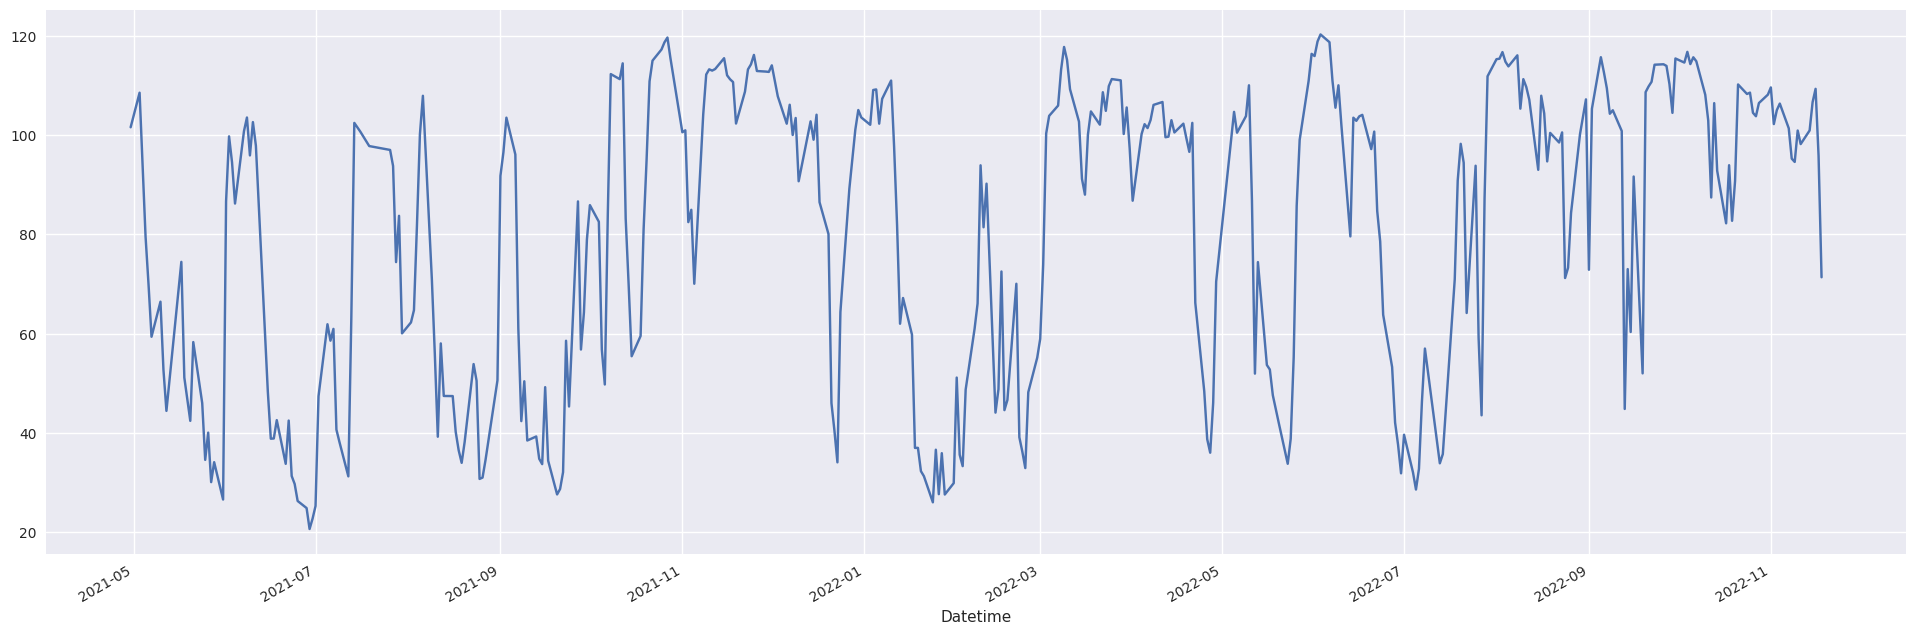

In [71]:
ext_df.kz_score.plot(figsize=(24,8))

In [72]:
ext_df.shape, df.shape

((388, 127), (389, 220))

In [73]:
df.index, ext_df.index

(DatetimeIndex(['2021-04-29', '2021-04-30', '2021-05-03', '2021-05-04',
                '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-10',
                '2021-05-11', '2021-05-12',
                ...
                '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
                '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
                '2022-11-17', '2022-11-18'],
               dtype='datetime64[ns]', name='Datetime', length=389, freq=None),
 DatetimeIndex(['2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
                '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
                '2021-05-12', '2021-05-17',
                ...
                '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
                '2022-11-11', '2022-11-14', '2022-11-15', '2022-11-16',
                '2022-11-17', '2022-11-18'],
               dtype='datetime64[ns]', name='Datetime', length=388, freq=None))

<AxesSubplot:>

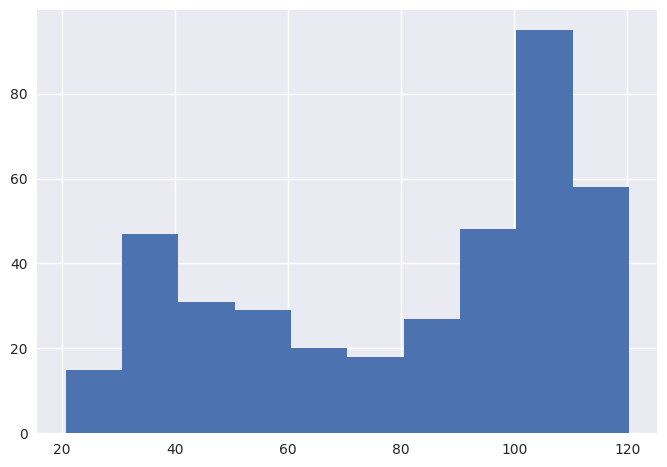

In [74]:
ext_df.kz_score.hist()

Text(0.5, 1.0, 'KZ Index')

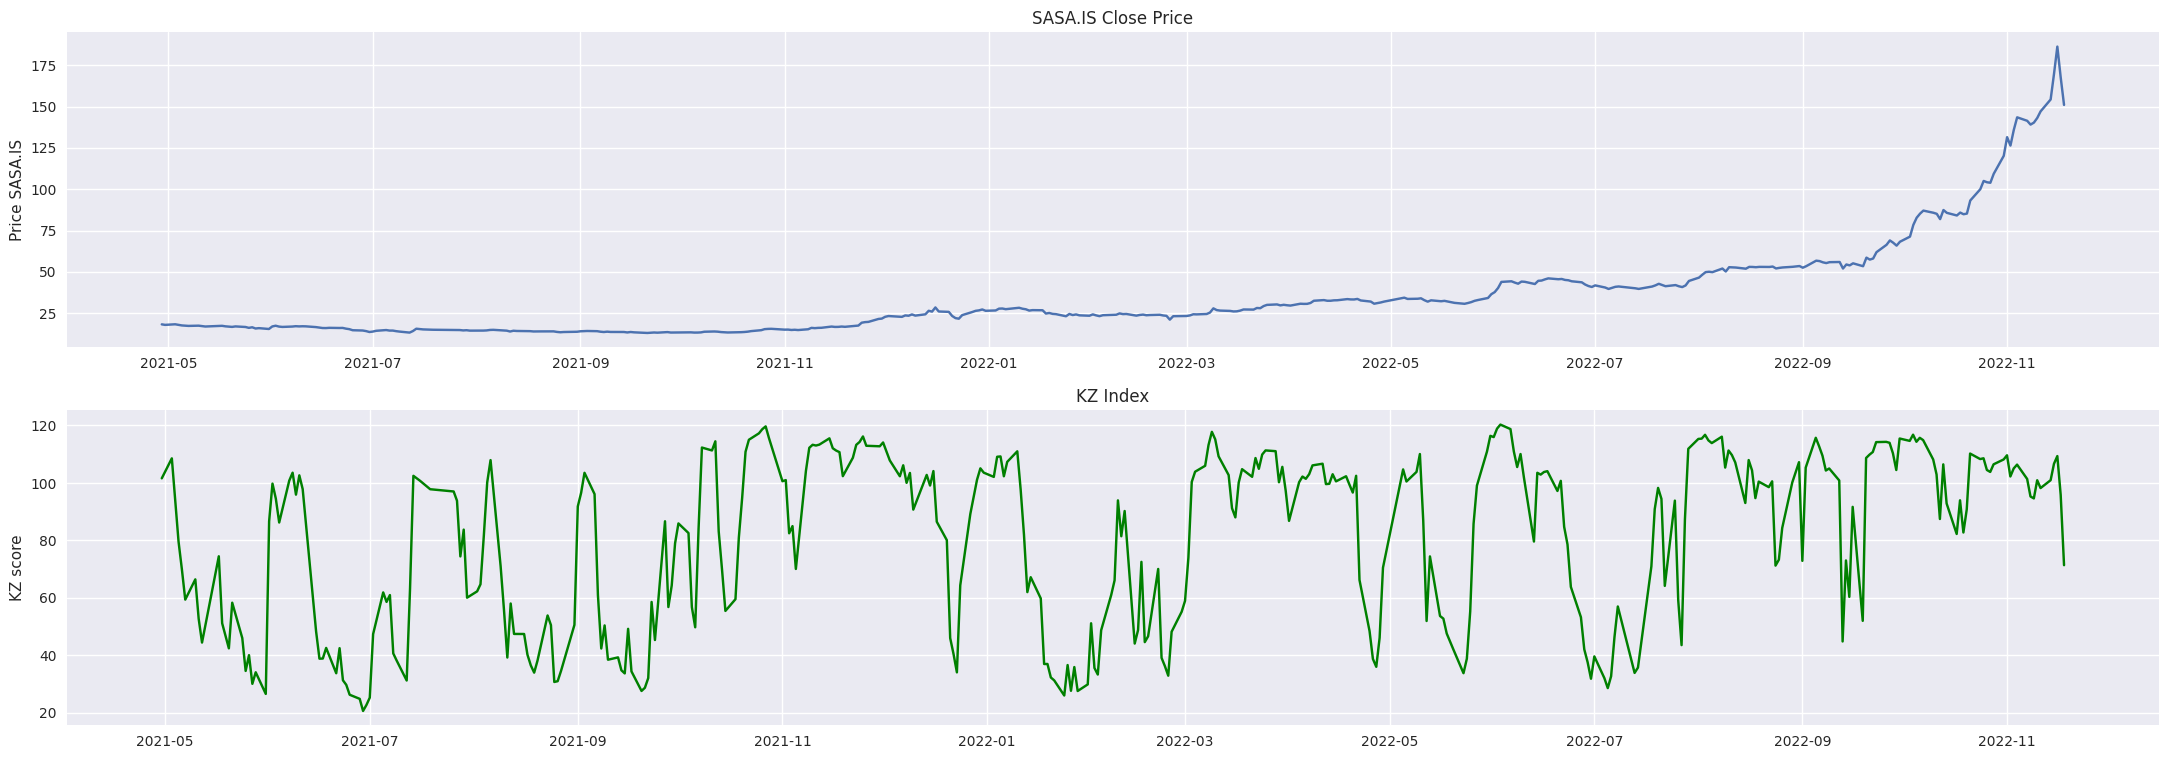

In [75]:
kz = ext_df.kz_score
close = df.close

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(27,9))
ax1.plot(close)
ax1.set_ylabel(f'Price {data.symbol}')
ax1.set_title(f'{data.symbol} Close Price')

ax2.plot(kz, color='green')
ax2.set_ylabel('KZ score')
ax2.set_title('KZ Index')

In [76]:
df.drop(df.index[0], inplace=True)

In [77]:
df['kz_score'] = ext_df.kz_score

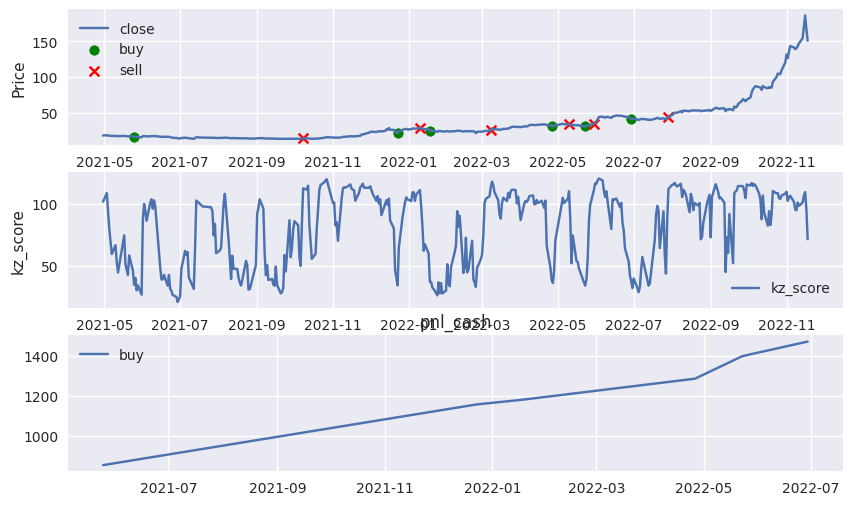

In [78]:
st_kz_score = bt.bt_threshold(df, 'kz_score', 110, 40)
bt.bt_plot_ind(df, st_kz_score, 'kz_score')

In [79]:
st_kz_score

,entry_time,exit_time,entry_price,exit_price,pnl_percent,pnl_cash
0,2021-05-25,2021-10-08,16.1000,13.7500,-0.1460,853.0372
1,2021-12-23,2022-01-10,21.6400,28.2500,0.3055,1157.6371
2,2022-01-18,2022-03-08,24.7600,25.3750,0.0248,1181.3179
3,2022-04-26,2022-05-10,30.7000,33.9800,0.1068,1286.9769
4,2022-05-23,2022-05-30,30.6600,34.1800,0.1148,1400.4975
5,2022-06-29,2022-07-29,41.4000,44.4800,0.0744,1473.4931


In [80]:
df.kz_score.tail()

Datetime
2022-11-14   100.9613
2022-11-15   106.6719
2022-11-16   109.3503
2022-11-17    95.8478
2022-11-18    71.3808
Name: kz_score, dtype: float64